##Stil Transferi

Bu uygulamada TensorFlow Hub üzerinden stil transfer modeli kullanıldı.

###Kütüphanelerin Yüklenmesi

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
from PIL import Image, ImageOps
import numpy as np

###Modelin Yüklenmesi ve Fonksiyonların Tanımlanması

In [ ]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
def load_image(img_path,max_dim):
  img = Image.open(img_path).convert('RGB')
  img = ImageOps.exif_transpose(img)
  img.thumbnail((max_dim,max_dim))
  arr = np.array(img)/255.0
  return tf.expand_dims(arr.astype(np.float32),axis=0)


In [ ]:
def stylize(content_path,style_path,content_max=512,style_max=256):
  content = load_image(content_path,content_max)
  style = load_image(style_path,style_max)
  outputs = model(tf.constant(content),tf.constant(style))
  stylized = outputs[0][0].numpy()
  stylized = (stylized*255).clip(0,255).astype(np.uint8)
  return Image.fromarray(stylized)



###Dosyaların Yüklenmesi

In [ ]:
from google.colab import files
print('İçerik dosyasını yükleyin.')
uploaded = files.upload()
content_path = list(uploaded.keys())[0]


İçerik dosyasını yükleyin.


Saving 20201122_190425.jpg to 20201122_190425 (4).jpg


In [ ]:
print('Stil dosyasını yükleyin.')
uploaded = files.upload()
style_path = list(uploaded.keys())[0]


Stil dosyasını yükleyin.


Saving anime.jpg to anime (2).jpg


###Stil Transferinin Yapılması

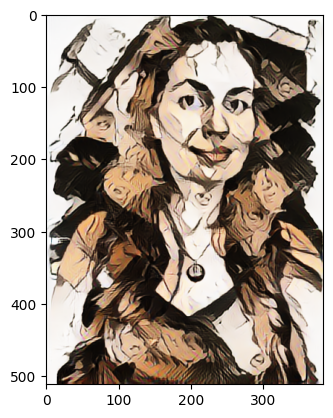

In [ ]:
import matplotlib.pyplot as plt
result = stylize(content_path,style_path)
plt.imshow(result)


###Dosyayı Kaydet ve İndir

In [ ]:
result.save('result.jpg')
files.download('result.jpg')